# Customer Churn Prediction

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [42]:
df=pd.read_csv(r"E:\Rajeesh\Linear Regression\telecom.csv")

## Understanding the Data set

In [43]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6152,7562-GSUHK,Female,0,No,No,16,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.20,1573.7,Yes
6806,4933-BSAIP,Female,0,Yes,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.1,No
590,0619-OLYUR,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.90,8071.05,No
4830,0536-ESJEP,Male,0,Yes,No,54,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.55,4191.45,No
4081,7665-TOALD,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes


In [44]:
# Removing custmer id, which is not need for analysis
df.drop('customerID',axis='columns',inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# Totalcharges column in object type, need to change to float

In [46]:
df.TotalCharges.values # string format


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [47]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [48]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [49]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# passing that to a data frame, which serve as an index

In [50]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [52]:
df.shape

(7043, 20)

In [ ]:
# we have only 11 rows with null in total of 7043 rows

In [53]:
#checking for 1 row
df.iloc[488]['TotalCharges']

' '

In [54]:
df1=df[df.TotalCharges!=' ']

In [56]:
df1['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7032, dtype: bool

In [57]:
df1.shape

(7032, 20)

In [58]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [59]:
df1.TotalCharges.dtypes

dtype('float64')

In [ ]:
# Graph representation of tenure customer/loyal customer

In [60]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

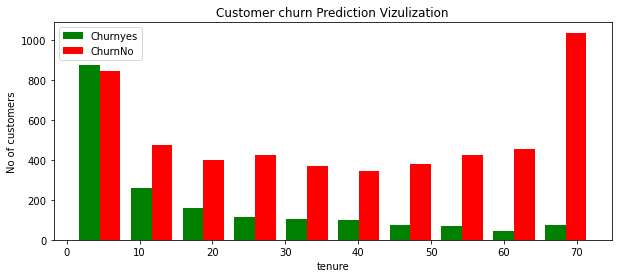

In [61]:
plt.figure(figsize=(10,4))
plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.title("Customer churn Prediction Vizulization")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churnyes','ChurnNo'])
plt.legend()

In [ ]:
#find out unique value in each column of object type

In [62]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object' :
            print(f'{column} : {df[column].unique()}')

In [63]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
# replacing 'No Internet services' with No

In [64]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [65]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [66]:
li=[]
for k,v in df1.items():
    pass
    for i in v:
        pass
        if i =='Yes' or i=='No' :
            li.append(k)
    

In [67]:
print(set(li))

{'Dependents', 'StreamingMovies', 'PaperlessBilling', 'InternetService', 'PhoneService', 'Churn', 'Partner', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'DeviceProtection', 'TechSupport', 'MultipleLines'}


In [68]:
len(set(li))

13

In [69]:
len(df1.columns)

20

In [70]:
yes_no=set(li)

In [71]:
yes_no=list(yes_no)

In [72]:
yes_no

['Dependents',
 'StreamingMovies',
 'PaperlessBilling',
 'InternetService',
 'PhoneService',
 'Churn',
 'Partner',
 'OnlineSecurity',
 'OnlineBackup',
 'StreamingTV',
 'DeviceProtection',
 'TechSupport',
 'MultipleLines']

In [73]:
#replacing yes_no with 0 and 1
for col in yes_no:
    df1[col].replace({'Yes' : 1, 'No' : 0},inplace=True)

In [83]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [81]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [85]:
# one hot encoding using pandas get dummy function

In [86]:
df2=pd.get_dummies(data=df1,columns=['InternetService','PaymentMethod','Contract'])

In [87]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [88]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
2642,1,0,1,0,47,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
5654,0,1,1,0,70,1,0,1,1,1,...,0,0,1,0,1,0,0,0,0,1
2260,1,0,0,0,3,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [89]:
df2.shape

(7032, 27)

In [90]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [99]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [100]:
#scaling the column

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [105]:
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [107]:
df2.shape

(7032, 27)

In [112]:
df2.sample(3).Churn

2298    0
492     1
1731    1
Name: Churn, dtype: int64

In [109]:
X=df2.drop('Churn',axis='columns')

In [110]:
y=df2['Churn']

In [111]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [118]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [119]:
X_train.shape

(5625, 26)

In [120]:
X_test.shape

(1407, 26)

In [121]:
#Creating ANN Algorithm

In [126]:
import tensorflow as tf
from tensorflow import keras

In [127]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    
    keras.layers.Dense(1,activation='sigmoid')
]

)

In [128]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics='accuracy')

In [145]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8473
Epoch 2/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8471
Epoch 3/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8459
Epoch 4/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8452
Epoch 5/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8437
Epoch 6/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8436
Epoch 7/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.8473
Epoch 8/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8453
Epoch 9/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8487
Epoch 10/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.329

In [146]:
yp=model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [147]:
yp[:5]

array([[0.7523711 ],
       [0.5601176 ],
       [0.00188643],
       [0.8550174 ],
       [0.09455292]], dtype=float32)

In [148]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [149]:
y_predict=[]
for i in yp:
    if i>0.5:
        y_predict.append(1)
    else :
        y_predict.append(0)

In [150]:
y_predict[:5]

[1, 1, 0, 1, 0]

In [138]:
#Classification report and confusion matrix

In [151]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       999
           1       0.58      0.47      0.52       408

    accuracy                           0.75      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.74      0.75      0.74      1407



Text(69.0, 0.5, 'Truth')

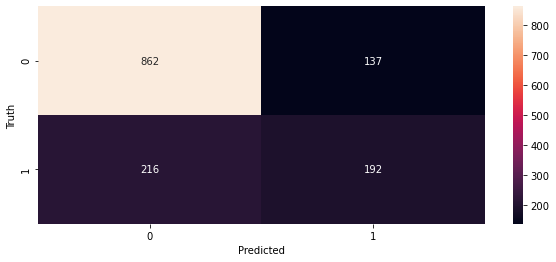

In [152]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')